In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-score-classification/train.csv
/kaggle/input/credit-score-classification/test.csv


# 1 - Ler os dados

In [3]:
df = pd.read_csv('/kaggle/input/credit-score-classification/train.csv')

/tmp/ipykernel_34/1346831657.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/credit-score-classification/train.csv')


# 2 - Fazer Analise

In [4]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Colunas Uteis

Month
Annual_Income (renda anual)
Monthly_Inhand_Salary  (salario liquido)
Num_of_Loan   (numero de emprestimo)
Num_of_Delayed_Payment    (atraso de contas)
Outstanding_Debt          (dividas a pagar)
Credit_Utilization_Ratio > 30%
Payment_Behaviour (descrição de comportamento pagamento)

High spent Small value payments
Low spent Large value payments
Low spent Small value payments,
Low spent Medium value payments,
High spent Medium value payments, 
!@9#%8,
High spent Large value payments

Alto gasto Pagamentos de pequeno valor
Baixo gasto Pagamentos de grande valor
Baixo gasto Pagamentos de pequeno valor,
Baixo gasto Pagamentos de médio valor,
Alto gasto Pagamentos de médio valor,
!@9#%8,
Alto gasto Pagamentos de grande valor

In [7]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

## Colunas escolhidas

In [8]:
df[['Month',
'Annual_Income',
'Monthly_Inhand_Salary',
'Num_of_Loan',
'Num_of_Delayed_Payment',
'Outstanding_Debt',
'Credit_Utilization_Ratio'
]].isna().sum()

Month                           0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_of_Loan                     0
Num_of_Delayed_Payment       7002
Outstanding_Debt                0
Credit_Utilization_Ratio        0
dtype: int64

In [9]:
df[['Month',
'Annual_Income',
'Monthly_Inhand_Salary',
'Num_of_Loan',
'Num_of_Delayed_Payment',
'Outstanding_Debt',
'Credit_Utilization_Ratio'
]]

,Month,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Num_of_Delayed_Payment,Outstanding_Debt,Credit_Utilization_Ratio
0,January,19114.12,1824.843333,4,7,809.98,26.822620
1,February,19114.12,NaN,4,NaN,809.98,31.944960
2,March,19114.12,NaN,4,7,809.98,28.609352
3,April,19114.12,NaN,4,4,809.98,31.377862
4,May,19114.12,1824.843333,4,NaN,809.98,24.797347
...,...,...,...,...,...,...,...
99995,April,39628.99,3359.415833,2,7,502.38,34.663572
99996,May,39628.99,3359.415833,2,7,502.38,40.565631
99997,June,39628.99,3359.415833,2,6,502.38,41.255522
99998,July,39628.99,3359.415833,2,NaN,502.38,33.638208


In [10]:
df[['Month',
'Annual_Income',
'Monthly_Inhand_Salary',
'Num_of_Loan',
'Num_of_Delayed_Payment',
'Outstanding_Debt',
'Credit_Utilization_Ratio'
]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Annual_Income             100000 non-null  object 
 2   Monthly_Inhand_Salary     84998 non-null   float64
 3   Num_of_Loan               100000 non-null  object 
 4   Num_of_Delayed_Payment    92998 non-null   object 
 5   Outstanding_Debt          100000 non-null  object 
 6   Credit_Utilization_Ratio  100000 non-null  float64
dtypes: float64(2), object(5)
memory usage: 5.3+ MB


In [11]:
df.Num_of_Delayed_Payment.unique()
#vendo como esta e mudando para ficar tudo em numerico

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

In [12]:
#df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.replace('_','')
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.str.replace('_','')

In [13]:
df.Num_of_Delayed_Payment.unique()

array(['7', nan, '4', '8', '6', '1', '-1', '3', '0', '5', '9', '12', '15',
       '17', '10', '2', '11', '14', '20', '22', '13', '16', '18', '19',
       '23', '24', '21', '3318', '3083', '1338', '26', '3104', '25',
       '183', '1106', '834', '2672', '2008', '-3', '538', '27', '-2',
       '3478', '2420', '707', '708', '3815', '28', '1867', '2250', '1463',
       '4126', '2882', '1941', '2655', '2628', '132', '3069', '306',
       '3539', '3684', '1823', '4128', '1946', '827', '2297', '2566',
       '904', '182', '929', '3568', '2503', '1552', '2812', '1697',
       '3764', '851', '3905', '923', '88', '1668', '3253', '808', '2689',
       '3858', '642', '3457', '1402', '1732', '3154', '847', '3037',
       '2204', '3103', '1063', '2056', '1282', '1841', '2569', '211',
       '793', '3484', '411', '3491', '2072', '3050', '1049', '2162',
       '3402', '2753', '1718', '1014', '3260', '3855', '84', '2311',
       '3251', '1832', '4069', '3010', '733', '4241', '166', '2461',
       '1749

In [14]:
#transformando em number
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.astype(float)

In [15]:
#transformando restante <0 recebe 0, null = 0
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.fillna(0)
df.loc[df.Num_of_Delayed_Payment < 0, 'Num_of_Delayed_Payment'] = 0

In [16]:
#transformando pra int
#sd.salary = df.salary.fillna(df.anual_salary/12)
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.astype(int)

In [17]:
#nudando tipo das colunas restantes
df[[
'Annual_Income',
'Monthly_Inhand_Salary',
'Num_of_Loan',
'Num_of_Delayed_Payment',
'Outstanding_Debt',
'Credit_Utilization_Ratio'
]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  object 
 1   Monthly_Inhand_Salary     84998 non-null   float64
 2   Num_of_Loan               100000 non-null  object 
 3   Num_of_Delayed_Payment    100000 non-null  int64  
 4   Outstanding_Debt          100000 non-null  object 
 5   Credit_Utilization_Ratio  100000 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [18]:
#todas tem o caractere _ então vou mudar
df.Annual_Income = df.Annual_Income.str.replace('_','')
df.Num_of_Loan = df.Num_of_Loan.str.replace('_','')
df.Outstanding_Debt = df.Outstanding_Debt.str.replace('_','')
#mudando tipo
df.Annual_Income = df.Annual_Income.astype(float)
df.Num_of_Loan = df.Num_of_Loan.astype(int)
df.Outstanding_Debt = df.Outstanding_Debt.astype(float)

In [19]:
df[[
'Annual_Income',
'Monthly_Inhand_Salary',
'Num_of_Loan',
'Num_of_Delayed_Payment',
'Outstanding_Debt',
'Credit_Utilization_Ratio'
]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  float64
 1   Monthly_Inhand_Salary     84998 non-null   float64
 2   Num_of_Loan               100000 non-null  int64  
 3   Num_of_Delayed_Payment    100000 non-null  int64  
 4   Outstanding_Debt          100000 non-null  float64
 5   Credit_Utilization_Ratio  100000 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 4.6 MB


In [20]:
#usar apenas a coluna Monthly_Inhand_Salary  (salario liquido)
# e os qe não tiverem dados, fazer base do Annual_Income (renda anual) ano dividido por 12
#quem tem o dado Monthly_Inhand_Salary  quero que seja o valor oficial do salario
df.Monthly_Inhand_Salary = df.Monthly_Inhand_Salary.fillna(df.Annual_Income/12)

In [21]:
#la
df['Payment_Behaviour'] = pd.factorize(df['Payment_Behaviour'])[0] + 1

In [22]:
df['Payment_Behaviour'].value_counts()

4    25513
5    17540
3    13861
7    13721
1    11340
2    10425
6     7600
Name: Payment_Behaviour, dtype: int64

In [23]:
df['Changed_Credit_Limit'].unique()


array(['11.27', '_', '6.27', ..., '17.509999999999998', '25.16', '21.17'],
      dtype=object)

In [24]:
df.Changed_Credit_Limit = df.Changed_Credit_Limit.str.replace('_','0')

In [25]:
df.Changed_Credit_Limit = df.Changed_Credit_Limit.astype(float)

## Fim dos tratamento

In [26]:
#prediction target
y = df.Credit_Score
#predictive features
feature_names = ['Annual_Income',
'Num_of_Loan',
'Num_of_Delayed_Payment',
'Outstanding_Debt',
'Credit_Utilization_Ratio',
'Payment_Behaviour',
'Changed_Credit_Limit']
# Select data corresponding to features in feature_names
X = df[feature_names]

In [27]:
print(X.head())

   Annual_Income  Num_of_Loan  Num_of_Delayed_Payment  Outstanding_Debt  \
0       19114.12            4                       7            809.98   
1       19114.12            4                       0            809.98   
2       19114.12            4                       7            809.98   
3       19114.12            4                       4            809.98   
4       19114.12            4                       0            809.98   

   Credit_Utilization_Ratio  Payment_Behaviour  Changed_Credit_Limit  
0                 26.822620                  1                 11.27  
1                 31.944960                  2                 11.27  
2                 28.609352                  3                  0.00  
3                 31.377862                  4                  6.27  
4                 24.797347                  5                 11.27  


In [28]:
#arvore
import sklearn.tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

y_test

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


75721        Good
80184        Poor
19864        Good
76699        Poor
92991        Good
           ...   
42648    Standard
86306    Standard
45466        Poor
63724        Poor
34122        Poor
Name: Credit_Score, Length: 30000, dtype: object

In [29]:
X_train

,Annual_Income,Num_of_Loan,Num_of_Delayed_Payment,Outstanding_Debt,Credit_Utilization_Ratio,Payment_Behaviour,Changed_Credit_Limit
76513,151649.360,3,14,358.17,38.252928,2,0.48
60406,100465.140,0,14,990.20,40.708250,7,13.16
27322,43395.090,3,11,1103.70,35.041464,1,10.00
53699,80661.320,4,16,1482.15,33.109288,1,7.58
65412,81506.320,2,13,933.67,27.513472,1,11.02
...,...,...,...,...,...,...,...
6265,82065.160,3,9,106.83,35.131041,1,5.55
54886,14920.970,2,16,1288.58,33.572279,4,13.48
76820,66858.270,4,10,601.58,37.982933,3,4.16
860,19403.405,3,9,339.11,36.826610,2,3.90


In [30]:
y_train.unique()

array(['Poor', 'Standard', 'Good'], dtype=object)

In [31]:
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, criterion='gini' )
from sklearn.model_selection import train_test_split
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [32]:
y_pred_tree = tree.predict(X_test)

In [33]:
accuracy_tree = tree.score(X_test, y_test)
print("accuracy: ", accuracy_tree)

accuracy:  0.6232


In [34]:
#KNN
import sklearn.neighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn = knn.score(X_test, y_test)
print("accuracy: ", accuracy_knn)

accuracy:  0.7764333333333333


In [35]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn2 = knn.score(X_test, y_test)
print("accuracy: ", accuracy_knn2)

accuracy:  0.7824


In [36]:
y_pred = knn.predict(X_test)

In [37]:
from sklearn.metrics import classification_report


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.68      0.82      0.75      5322
        Poor       0.75      0.88      0.81      8805
    Standard       0.86      0.71      0.78     15873

    accuracy                           0.78     30000
   macro avg       0.76      0.81      0.78     30000
weighted avg       0.79      0.78      0.78     30000



## outlayers

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Dado a ser Testado

In [62]:
df.Credit_Utilization_Ratio

0        26.822620
1        31.944960
2        28.609352
3        31.377862
4        24.797347
           ...    
99995    34.663572
99996    40.565631
99997    41.255522
99998    33.638208
99999    34.192463
Name: Credit_Utilization_Ratio, Length: 100000, dtype: float64

In [65]:
dados = df.Payment_Behaviour

### BoxPlot

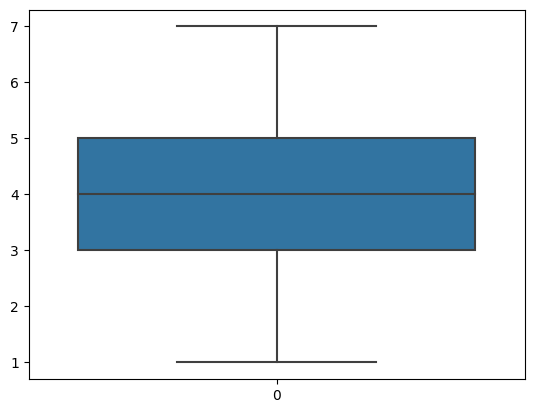

In [66]:
#Dados_de_exemplo
#dados = df.Outstanding_Debt

# Criação do boxplot
plt.figure()
sns.boxplot(dados)

# Exibição do gráfico
plt.show()

### Desvio Padrão

In [67]:
#Dados_de_exemplo
#dados = [5, 7, 8, 10, 12, 15, 20, 25, 100]

# Cálculo do desvio padrão
desvio_padrao = np.std(dados)

# Definição do limite para identificar outliers (por exemplo, 2 desvios padrão)
limite_outlier = 3 * desvio_padrao

# Identificação dos outliers
outliers = [valor for valor in dados if abs(valor - np.mean(dados)) > limite_outlier]

# Exibição dos outliers
print("Outliers:", outliers)

Outliers: []


### Z-score

In [69]:
# Dados de exemplo
#dados = [5, 7, 8, 10, 12, 15, 20, 25, 100]

# Cálculo do Z-score
z_scores = (dados - np.mean(dados)) / np.std(dados)

# Definição do limite para identificar outliers (por exemplo, Z-score > 3)
limite_zscore = 3

# Identificação dos outliers
outliers = [valor for valor, z_score in zip(dados, z_scores) if abs(z_score) > limite_zscore]

# Exibição dos outliers
print("Outliers:", outliers)

Outliers: []
